In [52]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [56]:
import cv2
from sklearn import metrics

In [58]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [60]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [62]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [64]:
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))
x_train2

array([[0.00090734, 0.00095348, 0.00096886, ..., 0.00189158, 0.00141484,
        0.00110727],
       [0.00236832, 0.00272203, 0.00287582, ..., 0.00219915, 0.00204537,
        0.00221453],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.0012303 , 0.00132257,
        0.00129181],
       ...,
       [0.00053825, 0.00273741, 0.00361399, ..., 0.00018454, 0.00047674,
        0.00076894],
       [0.00290657, 0.00324491, 0.00369089, ..., 0.00299885, 0.00292195,
        0.00262976],
       [0.00352172, 0.00352172, 0.00367551, ..., 0.00250673, 0.00250673,
        0.00247597]])

In [66]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))
x_test2

array([[0.00242983, 0.00172241, 0.00075356, ..., 0.00032295, 0.00103037,
        0.00169166],
       [0.00361399, 0.00361399, 0.00361399, ..., 0.00286044, 0.00307574,
        0.00306036],
       [0.00242983, 0.00292195, 0.00341407, ..., 0.00010765, 0.00012303,
        0.00010765],
       ...,
       [0.00030757, 0.00023068, 0.00018454, ..., 0.00038447, 0.00030757,
        0.0007228 ],
       [0.00038447, 0.00061515, 0.00018454, ..., 0.00141484, 0.00184544,
        0.0012303 ],
       [0.00112265, 0.00119954, 0.0011534 , ..., 0.00041522, 0.00039985,
        0.00039985]])

In [68]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

**Random** **Forest**

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model=RandomForestClassifier()

In [32]:
model.fit(x_train2,y_train.ravel())

RandomForestClassifier()

In [33]:
y_pred=model.predict(x_test2)
y_pred

array([4, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [34]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1003
           1       0.56      0.54      0.55      1047
           2       0.33      0.36      0.35       903
           3       0.27      0.33      0.30       807
           4       0.40      0.40      0.40      1000
           5       0.41      0.43      0.42       956
           6       0.54      0.46      0.50      1173
           7       0.45      0.50      0.48       901
           8       0.63      0.58      0.61      1079
           9       0.55      0.48      0.51      1131

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [35]:
cm1 =confusion_matrix(y_pred,y_test)

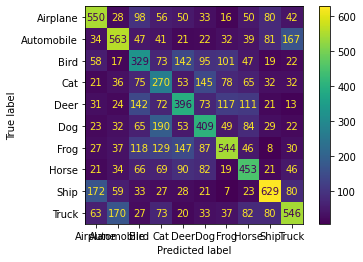

In [36]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_display.plot()
plt.show()

**K Nearest Neighbours**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)

In [39]:
knn.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [76]:
y_pred_knn = knn.predict(x_test2)
y_pred_knn

array([3, 3, 3, ..., 3, 3, 3], dtype=uint8)

In [77]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.10      0.18     10000
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.10      0.18     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
cm2 = confusion_matrix(y_pred_knn,y_test)

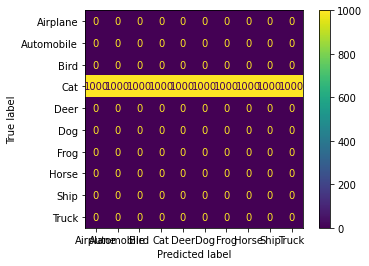

In [79]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_display.plot()
plt.show()

In [80]:
img_path='/content/bird.jfif'

In [81]:
img_arr=cv2.imread(img_path)

In [ ]:
img_arr=cv2.resize(img_arr,(32,32))